# Fraud Shield - Advanced Fraud Detection and Risk Analytics for Financial Transactions

## Problem Statement: 
The prevalence of financial fraud and inherent class imbalance in transaction data poses significant challenges for effective fraud detection. These challenges demand efficient detection methods to ensure customer security and maintain trust in financial systems.

## Objective
To employ machine learning algorithms and anomaly detection techniques, to effectively detect subtle fraudulent patterns, providing a proactive approach to fraud prevention. Additionally, to address the limitations of class imbalance inherent in the dataset, ensuring robust performance even in the face of skewed data distributions.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from geopy.distance import geodesic

## Importing Data

In [2]:
#Loading the train and test datasets
train_df = pd.read_csv('/Users/tusharsuvarna/Downloads/fraudTrain.csv')
test_df = pd.read_csv('/Users/tusharsuvarna/Downloads/fraudTest.csv')

## Credit Card Transactions Dataset Description

index - Unique Identifier for each row

trans_date_trans_time - Transaction DateTime

cc_num - Credit Card Number of Customer

merchant - Merchant Name

category - Category of Merchant

amt - Amount of Transaction

first - First Name of Credit Card Holder

last - Last Name of Credit Card Holder

gender - Gender of Credit Card Holder

street - Street Address of Credit Card Holder

city - City of Credit Card Holder

state - State of Credit Card Holder

zip - Zip of Credit Card Holder

lat - Latitude Location of Credit Card Holder

long - Longitude Location of Credit Card Holder

city_pop - Credit Card Holder's City Population

job - Job of Credit Card Holder

dob - Date of Birth of Credit Card Holder

trans_num - Transaction Number

unix_time - UNIX Time of transaction

merch_lat - Latitude Location of Merchant

merch_long - Longitude Location of Merchant

is_fraud - Fraud Flag <--- Target Class

In [3]:
train_df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                          

In [4]:
test_df

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
555714     Olson      M          558 Michael Estates  ...  40.4931  -91.8912   
555715   Vasquez      M          572 Davis Mountains  ...  29.0393  -95.4401   
555716    Lawson      F   144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717   Preston      M   7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718      Frey      M     830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                     job         dob  \
0         333497     Mechanical engineer  1968-03-19   
1            302  Sales professional, IT  1990-01-17   
2          34496       Librarian, public  1970-10-21   
3          54767            Set designer  1987-07-25   
4           1126      Furniture designer  1955-07-06   
...          ...                     ...         ...   
555714       519            Town planner  1966-02-13   
555715     28739          Futures trader  1999-12-27   
555716      3684                Musician  1981-11-29   
555717       129            Cartographer  1965-12-15   
555718    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1

## Data Preprocessing

In [5]:
#Dropping unnecessary column
train_df.drop("Unnamed: 0", axis=1, inplace=True)
test_df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
#Checking for null values in the training and testing datasets
train_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
test_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

### Data Imbalance Check

In [10]:
fraudulent_count = train_df['is_fraud'].value_counts()
lbl=["Genuine","Fraud"]
fig = px.pie(names=lbl, values=fraudulent_count.values, title='Fraudulent Transactions Distribution')
fig.show()

The dataset exhibits a substantial class imbalance, with Genuine transactions overwhelmingly predominant (99.421%), while Fraudulent transactions represent a minority (0.579%). 

To address this, resampling techniques or ensemble methods can be employed to balance the dataset during model training.

### Feature Engineering

In [11]:
#Calculating age
today = dt.datetime.today()
train_df['age'] = today.year - pd.to_datetime(train_df['dob']).dt.year
test_df['age'] = today.year - pd.to_datetime(test_df['dob']).dt.year

In [12]:
#Extracting Hour, Day, Month
train_df['hour'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
test_df['hour'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.hour
train_df['day'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.dayofweek
test_df['day'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.dayofweek
train_df['month'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.month
test_df['month'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.month

In [13]:
#Merchant - Cardholder Location Distance
def calculate_dist(row):
    card_holder_loc = (row['lat'], row['long'])
    merchant_loc = (row['merch_lat'], row['merch_long'])
    return geodesic(card_holder_loc, merchant_loc).km

train_df['merchant_distance'] = train_df.apply(calculate_dist, axis=1)
test_df['merchant_distance'] = test_df.apply(calculate_dist, axis=1)

In [14]:
#Transaction Amount Categories
amt_bins = [0, 50, 100, 200, 500, 1000, np.inf]
lbls = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High']

train_df['amount_category'] = pd.cut(train_df['amt'], bins=amt_bins, labels=lbls)
test_df['amount_category'] = pd.cut(test_df['amt'], bins=amt_bins, labels=lbls)

In [15]:
train_df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...   unix_time  merch_lat  merch_long  \
0                  Moravian Falls  ...  1325376018  36.011293  -82.048315   
1                          Orient  ...  1325376044  49.159047 -118.186462   
2                      Malad City  ...  1325376051  43.150704 -112.154481   
3                         Boulder  ...  1325376076  47.034331 -112.561071   
4                        Doe Hill  ...  1325376186  38.674999  -78.632459   
...                           ...  ...         ...        ...         ...   
1296670                     Hatch  ...  1371816728  36.841266 -111.690765   
1296671                 Tuscarora  ...  1371816739  38.906881  -78.246528   
1296672  High Rolls Mountain Park  ...  1371816752  33.619513 -105.130529   
1296673                 Manderson  ...  1371816816  42.788940 -103.241160   
1296674                      Sula  ...  1371816817  46.565983 -114.186110   

         is_fraud  age hour day month  merchant_distance  amount_category  
0               0   36    0   1     1          78.773821         Very Low  
1               0   46    0   1     1          30.216618           Medium  
2               0   62    0   1     1         108.102912             High  
3               0   57    0   1     1          95.685115         Very Low  
4               0   38    0   1     1          77.702395         Very Low  
...           ...  ...  ...  ..   ...                ...              ...  
1296670         0   63   12   6     6         119.696415         Very Low  
1296671         0   45   12   6     6          75.202184              Low  
1296672         0   

## Exploratory Data Analysis

### Transaction Amount Distribution

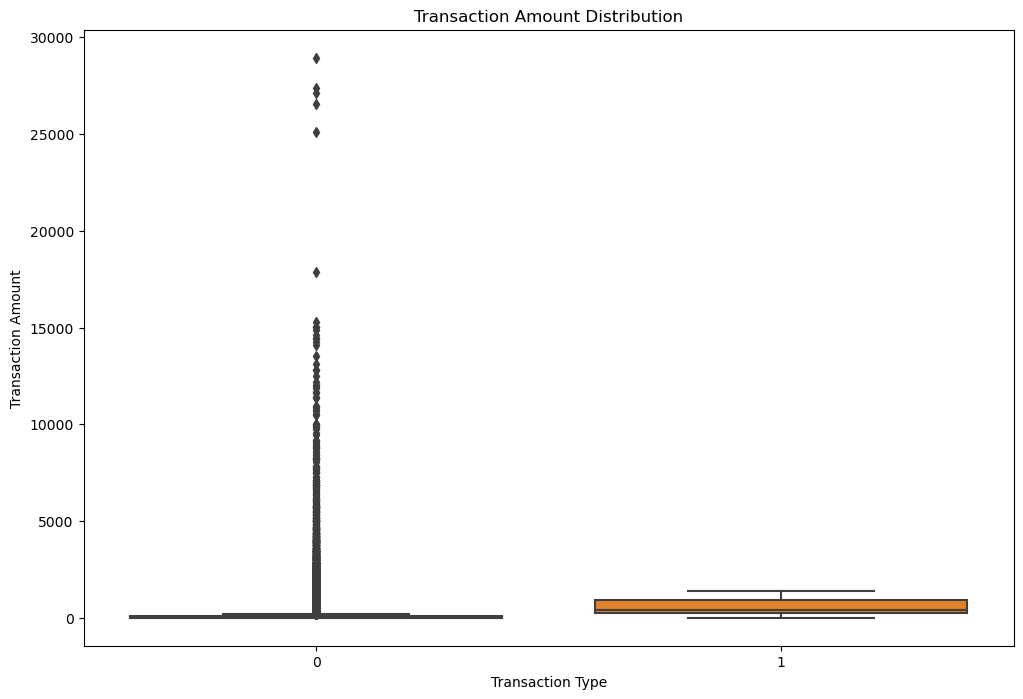

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=train_df)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

The Transaction Amount Distribution visualization reveals distinctive patterns between fraudulent and non-fraudulent transactions. While non-fraudulent transactions exhibit a diverse spread across a wide range of amounts, including concentrations in both small and large transactions, fraudulent transactions are predominantly clustered in smaller amounts, specifically within the 0 to 1200 bracket. This observation underscores the common trend in credit card fraud, where illicit activities often involve smaller transaction amounts to evade detection, contrasting with the broader spectrum of amounts seen in legitimate transactions.

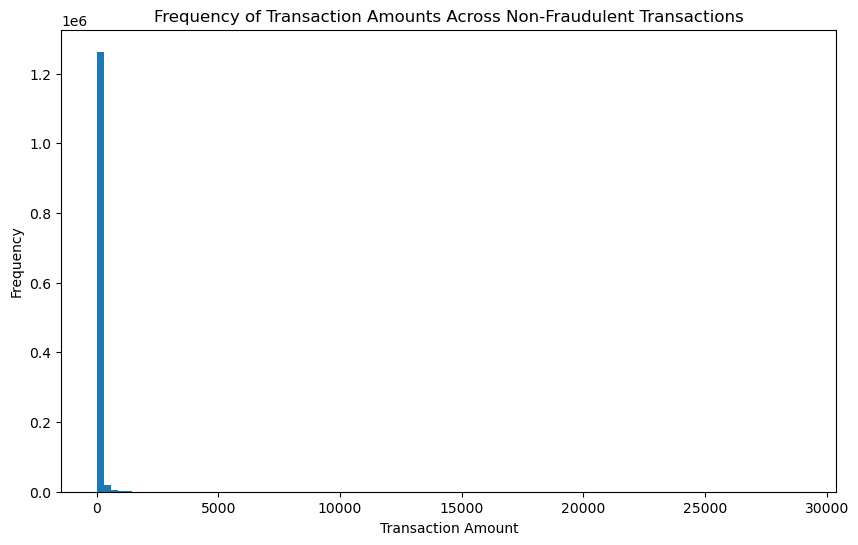

In [17]:
#Non-fraudulent Transaction Amount Distribution
not_fraud = train_df[train_df.is_fraud == 0]
plt.figure(figsize=(10, 6))
plt.hist(not_fraud['amt'], bins=100)
plt.title('Frequency of Transaction Amounts Across Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

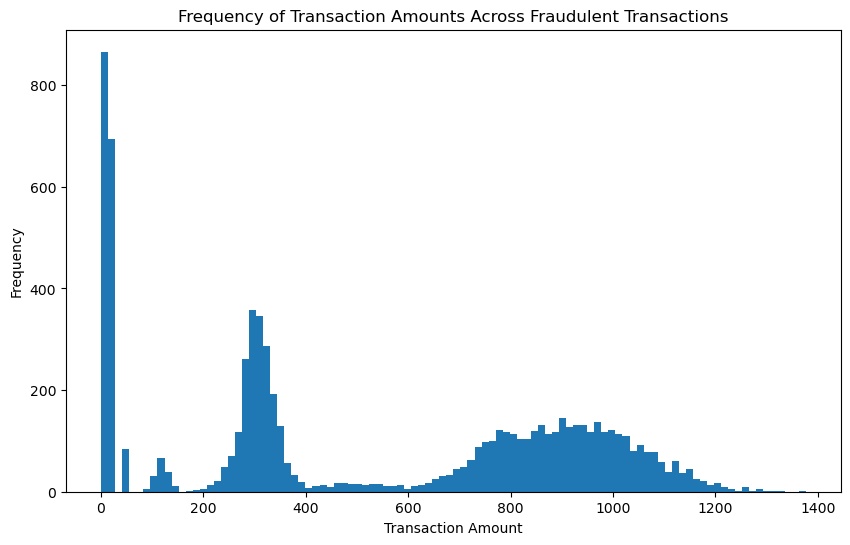

In [18]:
#Fraudulent Transaction Amount Distribution
fraud = train_df[train_df.is_fraud == 1]
plt.figure(figsize=(10, 6))
plt.hist(fraud['amt'], bins=100)
plt.title('Frequency of Transaction Amounts Across Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

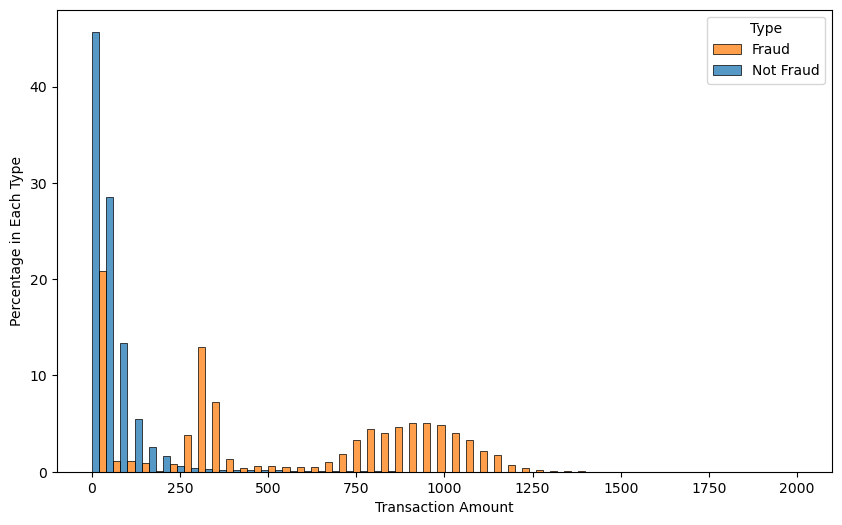

In [19]:
#Transaction Amount vs Fraud
plt.figure(figsize=(10, 6))
sns.histplot(x='amt', data=train_df[train_df.amt <= 2000], hue='is_fraud', multiple='dodge', stat='percent', common_norm=False, bins=50)
plt.ylabel('Percentage in Each Type')
plt.xlabel('Transaction Amount')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

### Gender Distribution

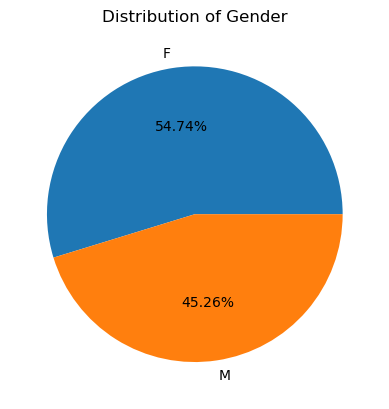

In [20]:
gender_dis= train_df['gender'].value_counts()
plt.pie(gender_dis, labels=gender_dis.index, autopct='%.2f%%')
plt.title("Distribution of Gender")
plt.show()

The pie chart illustrates a nearly equal distribution of gender in the dataset, with females representing approximately 54.74% and males around 45.26%.

### Fraudulent Transactions Across Category Types

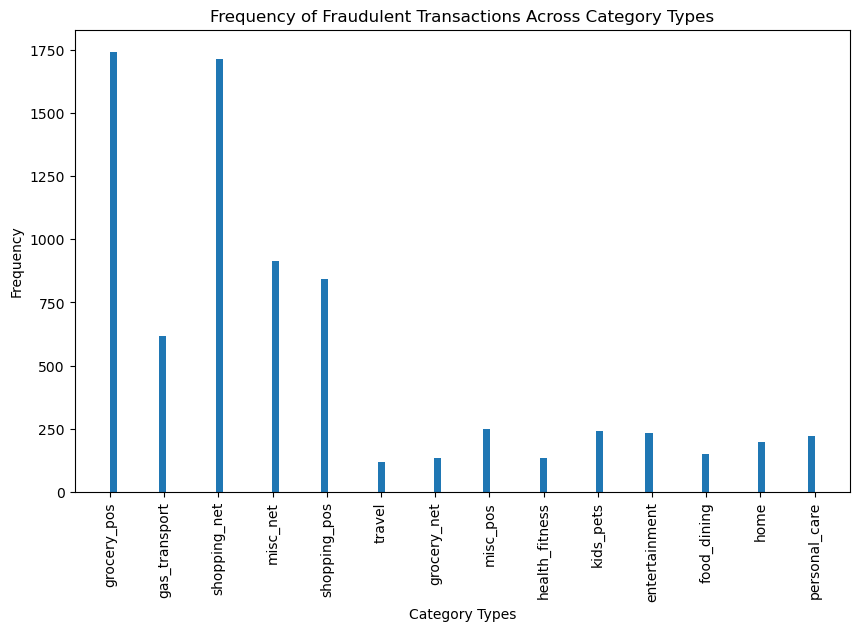

In [21]:
fraud = train_df[train_df['is_fraud'] == 1]
fraud_df = fraud['category']
plt.figure(figsize=(10, 6))
plt.hist(fraud_df, bins=100)
plt.title('Frequency of Fraudulent Transactions Across Category Types')
plt.xlabel('Category Types')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

The histogram above provides insights into the frequency of fraudulent transactions across various category types. Notably, the categories predominantly associated with fraudulent activities are 'grocery_pos' and 'shopping_net,' with 'shopping_pos,' 'gas_transport,' and 'misc_net' following closely.

### Age Distribution in Fraudulent vs Non-Fraudulent Transactions

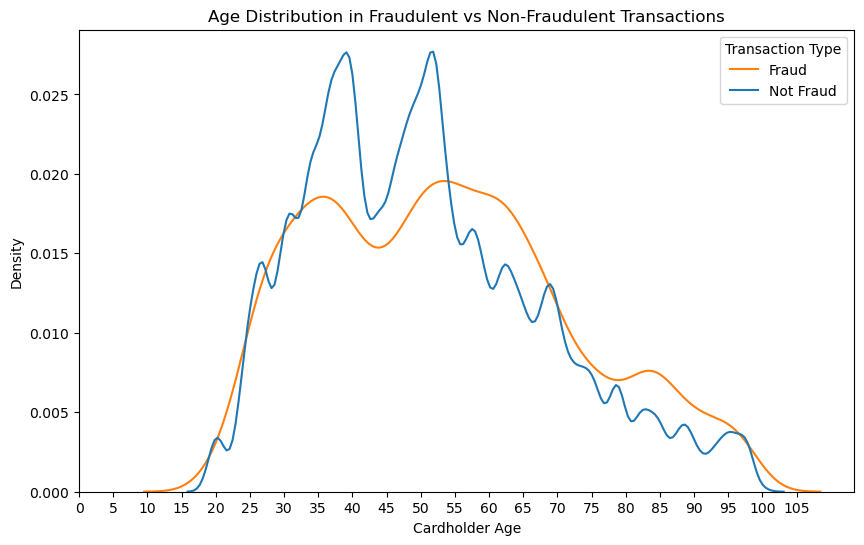

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='age', data=train_df, hue='is_fraud', common_norm=False)
plt.xlabel('Cardholder Age')
plt.ylabel('Density')
plt.xticks(np.arange(0, 110, 5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Transaction Type', labels=['Fraud', 'Not Fraud'])
plt.show()

The age distribution exhibits notable differences between non-fraudulent and fraudulent transactions. Non-fraudulent transactions display two distinct peaks around ages 35-40 and 50-55, indicating common age groups. Fraudulent transactions, on the other hand, present a smoother distribution with a broader peak spanning ages 50-70. This suggests a potential correlation between older age groups and increased susceptibility to credit card fraud.

### Temporal Patterns in Credit Card Fraud
Understanding the temporal distribution of fraudulent transactions is crucial for identifying patterns and potential trends. By analyzing the transaction time column, we can discern whether there are hourly, monthly, or seasonal variations in fraudulent activities.

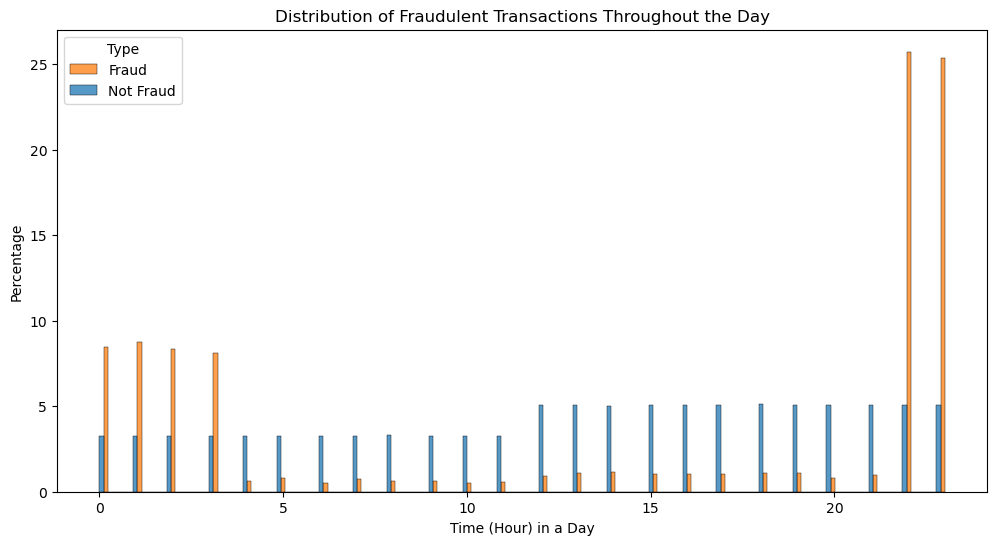

In [23]:
#Time in a Day vs Fraud
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x="hour", hue="is_fraud", common_norm=False, multiple='dodge', stat='percent', bins=100)
plt.ylabel('Percentage')
plt.xlabel('Time (Hour) in a Day')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.title('Distribution of Fraudulent Transactions Throughout the Day')
plt.show()

The temporal distribution reveals a conspicuous contrast: Legitimate transactions exhibit a consistent pattern throughout the day, whereas instances of fraudulent payments notably peak during the late-night hours of 10 PM to 11 PM, followed by the early morning hours of 12 AM to 3 AM. This discernible trend suggests an elevated vulnerability to fraudulent activities during these nocturnal and early morning intervals.

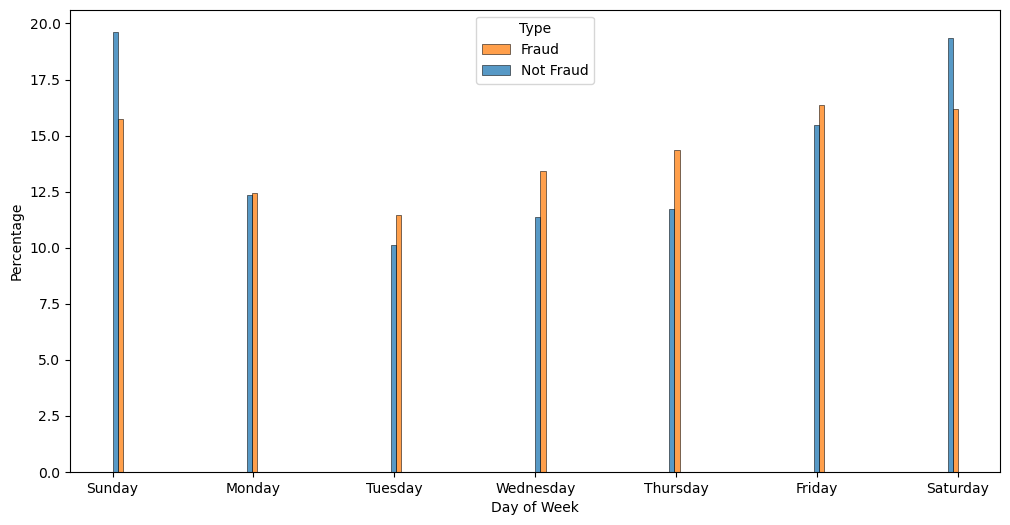

In [24]:
#Day vs Fraud Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x="day", hue="is_fraud", common_norm=False, multiple='dodge', stat='percent')
plt.xticks(np.arange(0, 7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.ylabel('Percentage')
plt.xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

The histogram illustrates the percentage of fraud and non-fraud transactions for each day. Contrary to the normal transaction pattern, where transactions peak on Saturdays and Sundays, fraudulent transactions exhibit a more even distribution throughout the week. Notably, there's a subtle increase in fraudulent activities specifically on Fridays, Saturdays, and Sundays, emphasizing the need for vigilant monitoring, particularly during weekends.

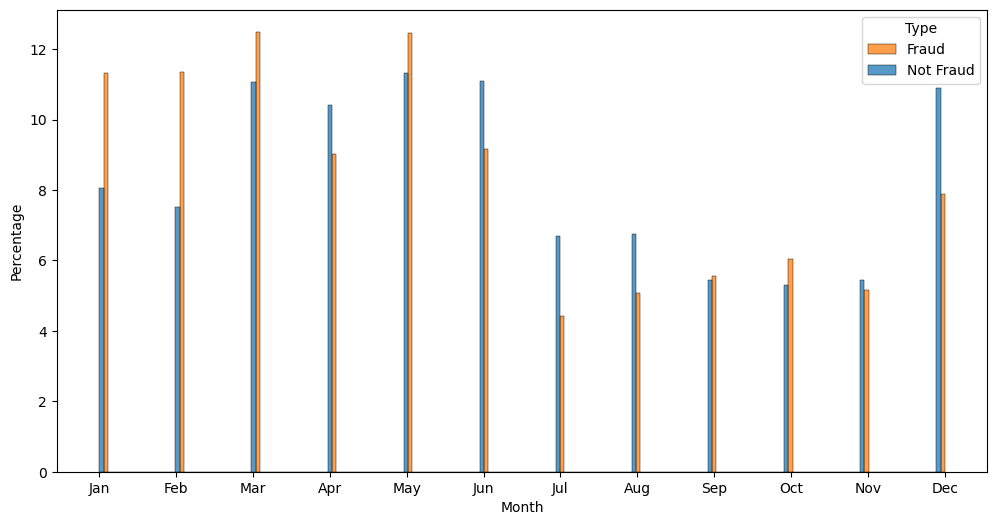

In [25]:
#Month vs Fraud Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x="month", hue="is_fraud", common_norm=False, multiple='dodge', stat='percent', bins=100)
plt.ylabel('Percentage')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

The insightful findings reveal distinct patterns in transaction behaviors. Regular transactions exhibit peak activity during December, coinciding with the holiday season, and a subsequent surge in late spring to early summer. In contrast, fraudulent transactions demonstrate concentrated prevalence from January to May, indicating a discernible seasonal trend.

### Geographical Distribution

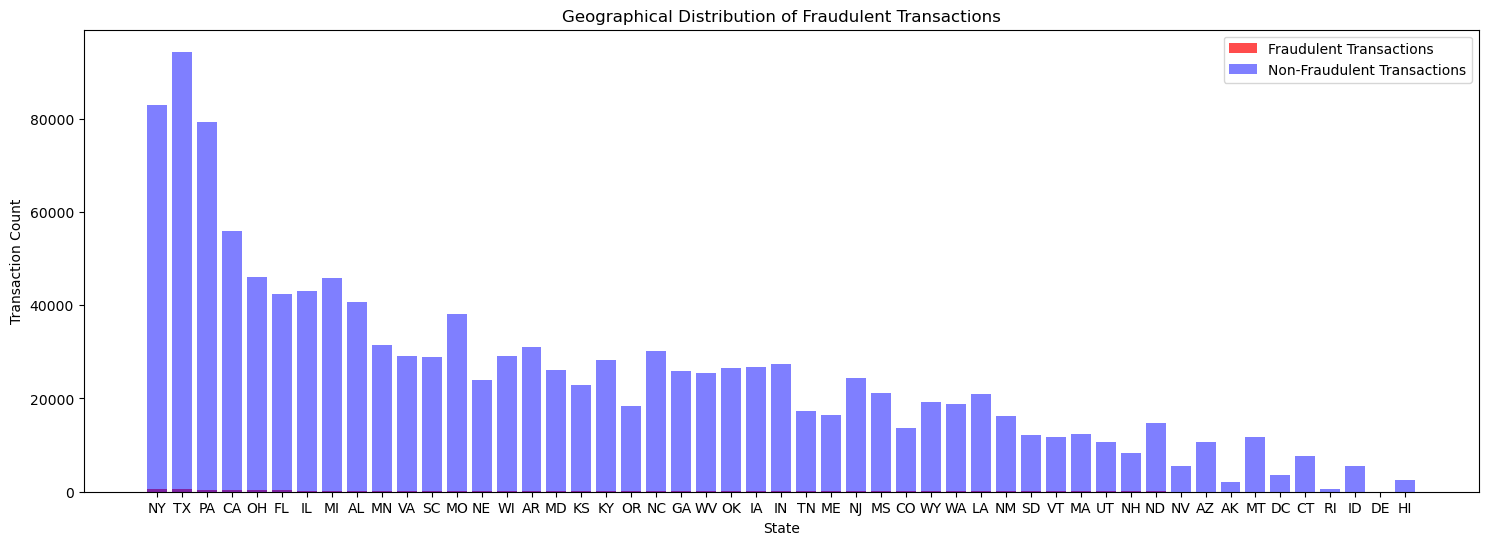

In [26]:
#State vs Fraud
plt.figure(figsize=(18, 6))

# Fraudulent Transactions
fraud = train_df[train_df['is_fraud'] == 1]
fraud_state_counts = fraud['state'].value_counts()
fraud_states = fraud_state_counts.index
fraud_counts = fraud_state_counts.values
plt.bar(fraud_states, fraud_counts, alpha=0.7, label='Fraudulent Transactions', color='red')

# Non-Fraudulent Transactions
non_fraud = train_df[train_df['is_fraud'] == 0]
non_fraud_state_counts = non_fraud['state'].value_counts()
non_fraud_states = non_fraud_state_counts.index
non_fraud_counts = non_fraud_state_counts.values
plt.bar(non_fraud_states, non_fraud_counts, alpha=0.5, label='Non-Fraudulent Transactions', color='blue')

plt.title('Geographical Distribution of Fraudulent Transactions')
plt.xlabel('State')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()

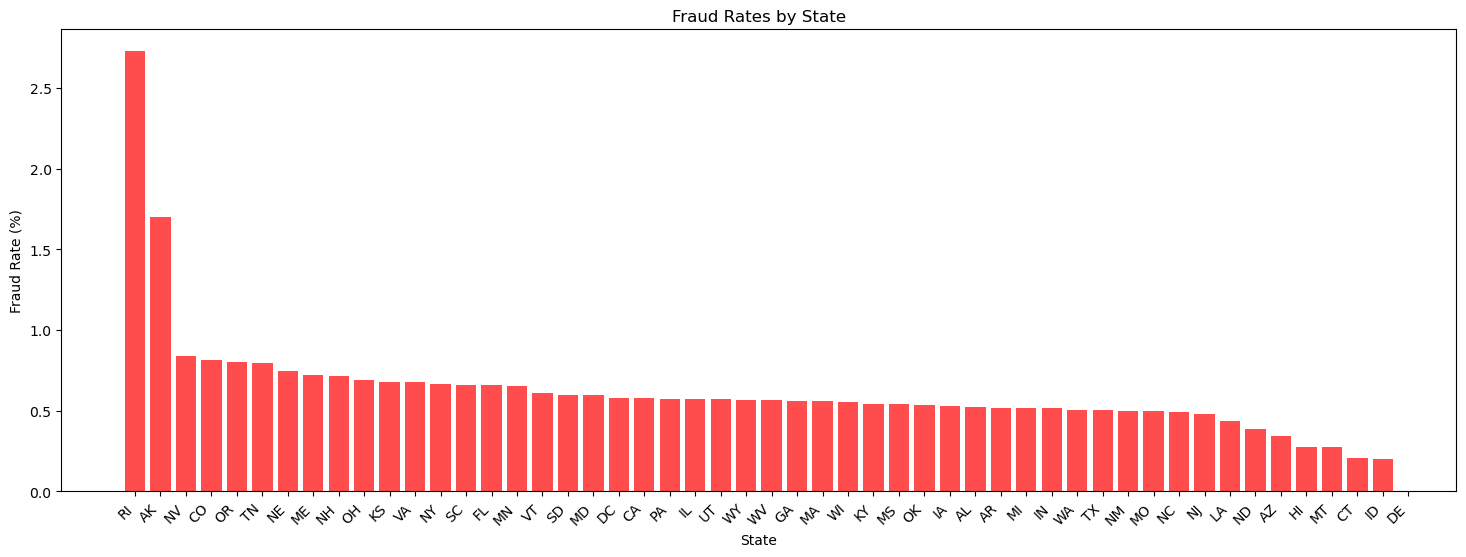

State with the Highest Fraud Rate: RI


In [27]:
#Fraud rates for each state
fraud_rates = (fraud_state_counts / (fraud_state_counts + non_fraud_state_counts)) * 100
sorted_states = fraud_rates.sort_values(ascending=False)
plt.figure(figsize=(18, 6))
plt.bar(sorted_states.index, sorted_states, color='red', alpha=0.7)
plt.title('Fraud Rates by State')
plt.xlabel('State')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

#State with the highest fraud rate
highest_fraud_state = sorted_states.index[0]
print("State with the Highest Fraud Rate:", highest_fraud_state)

After analyzing the geographical distribution of fraudulent transactions, the states with the highest fraud rates are Rhode Island (RI), Alaska (AK), and Nevada (NV).

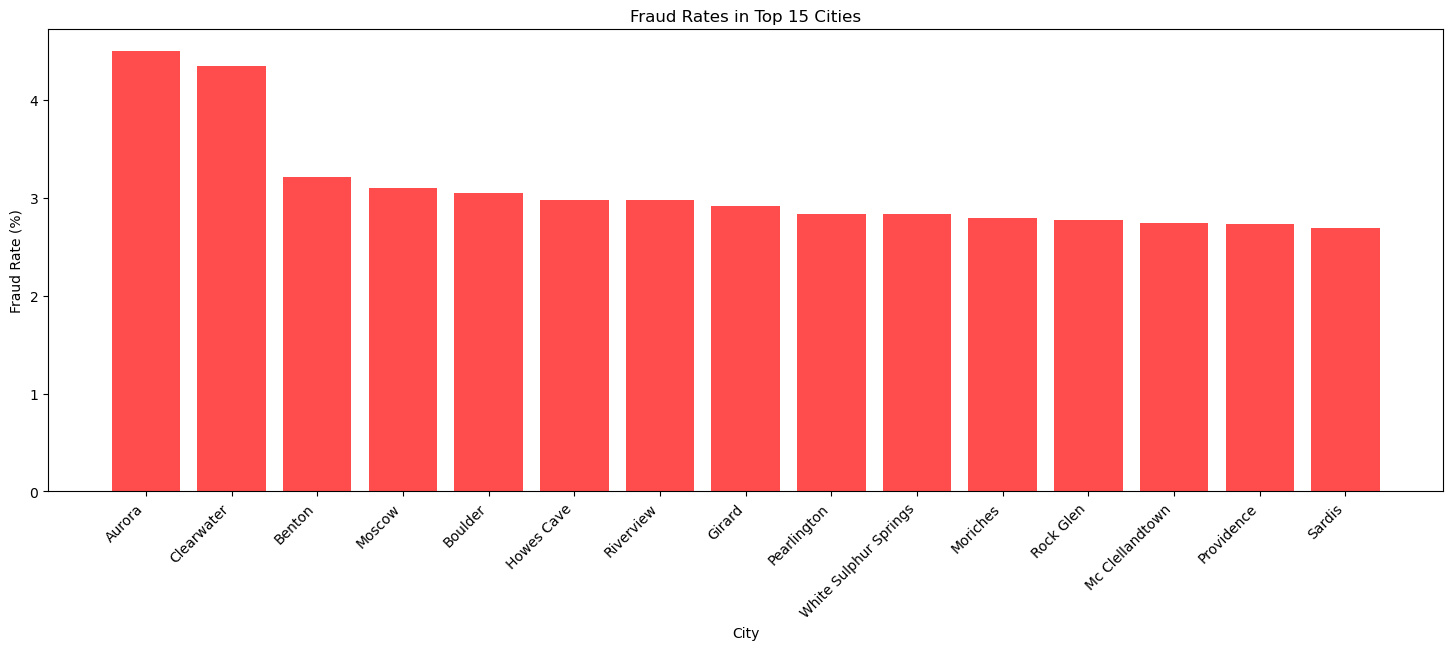

In [28]:
#Cities vs Fraud
# Fraudulent Transactions
fraud = train_df[train_df['is_fraud'] == 1]
fraud_city_counts = fraud['city'].value_counts()

# Non-Fraudulent Transactions
non_fraud = train_df[train_df['is_fraud'] == 0]
non_fraud_city_counts = non_fraud['city'].value_counts()

#Fraud rates for each city
fraud_city_rates = (fraud_city_counts / (fraud_city_counts + non_fraud_city_counts)) * 100
sorted_cities = fraud_city_rates.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 6))
plt.bar(sorted_cities.index, sorted_cities, color='red', alpha=0.7)
plt.title('Fraud Rates in Top 15 Cities')
plt.xlabel('City')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

The analysis reveals that Aurora, Clearwater, and Benton are the top three cities with the highest fraud rates.

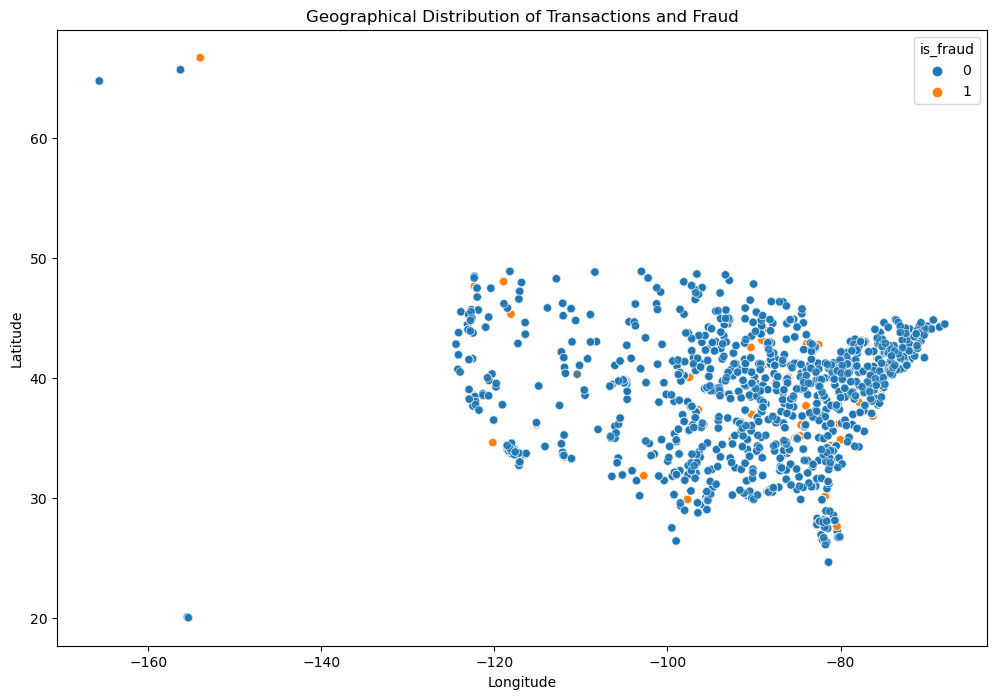

In [29]:
#Transactions vs Fraud
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=train_df, alpha=0.7)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

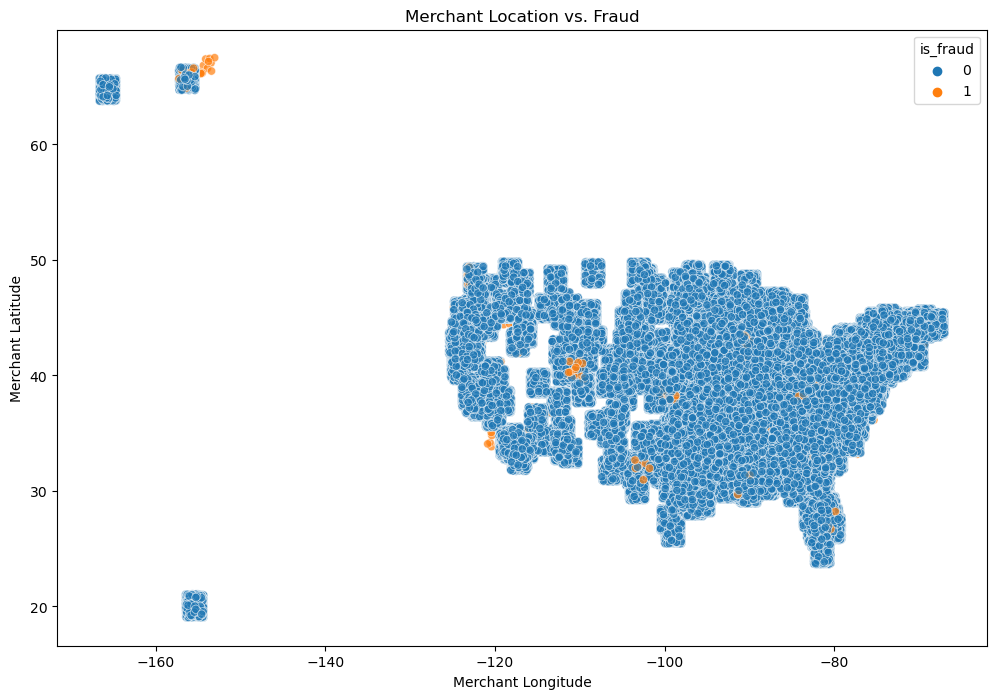

In [30]:
#Merchant Location vs Fraud
plt.figure(figsize=(12, 8))
sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=train_df, alpha=0.7)
plt.title('Merchant Location vs. Fraud')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.show()

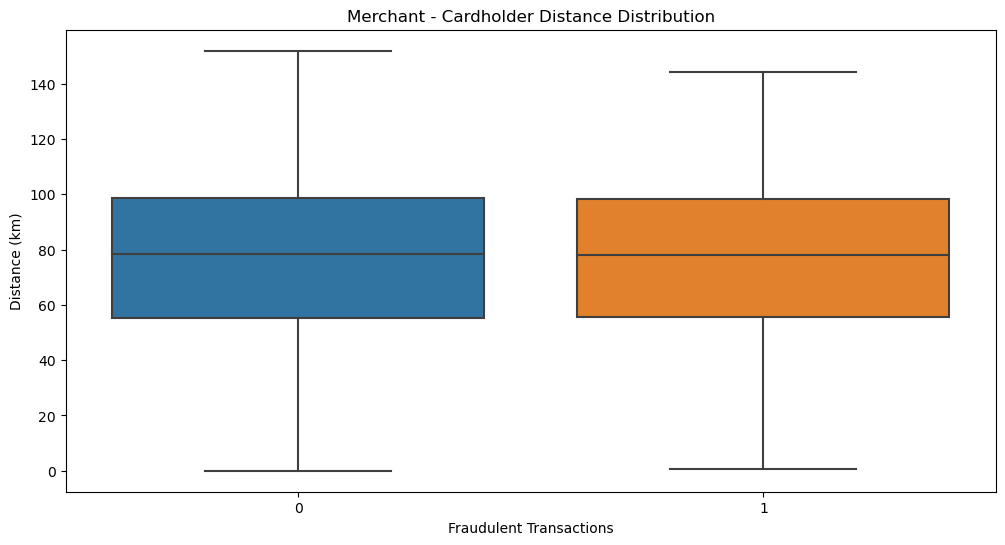

In [31]:
#Merchant - Cardholder Distance Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='merchant_distance', data=train_df)
plt.title('Merchant - Cardholder Distance Distribution')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Distance (km)')
plt.show()

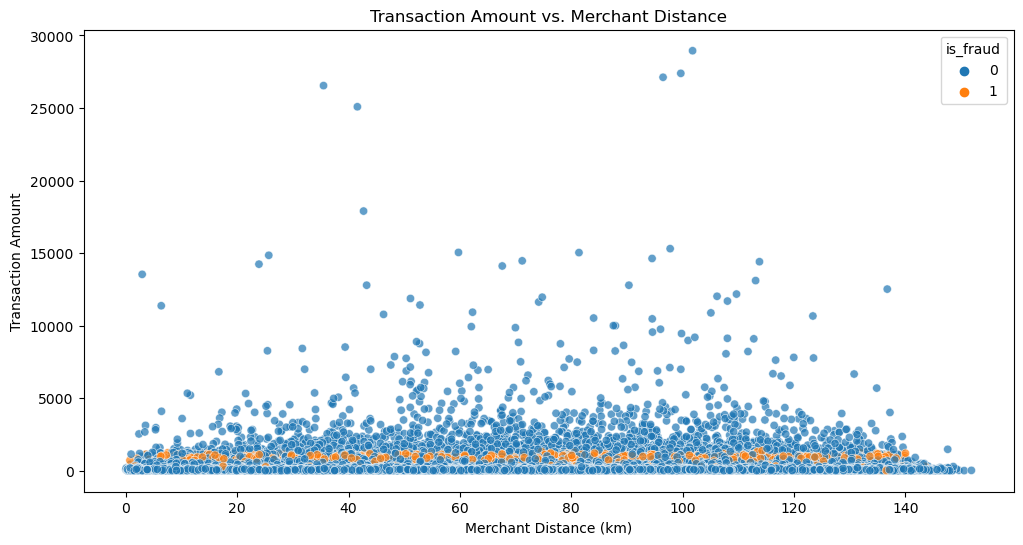

In [32]:
#Transaction Amount vs Merchant Distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='merchant_distance', y='amt', hue='is_fraud', data=train_df, alpha=0.7)
plt.title('Transaction Amount vs. Merchant Distance')
plt.xlabel('Merchant Distance (km)')
plt.ylabel('Transaction Amount')
plt.show()

### Correlation Heatmap

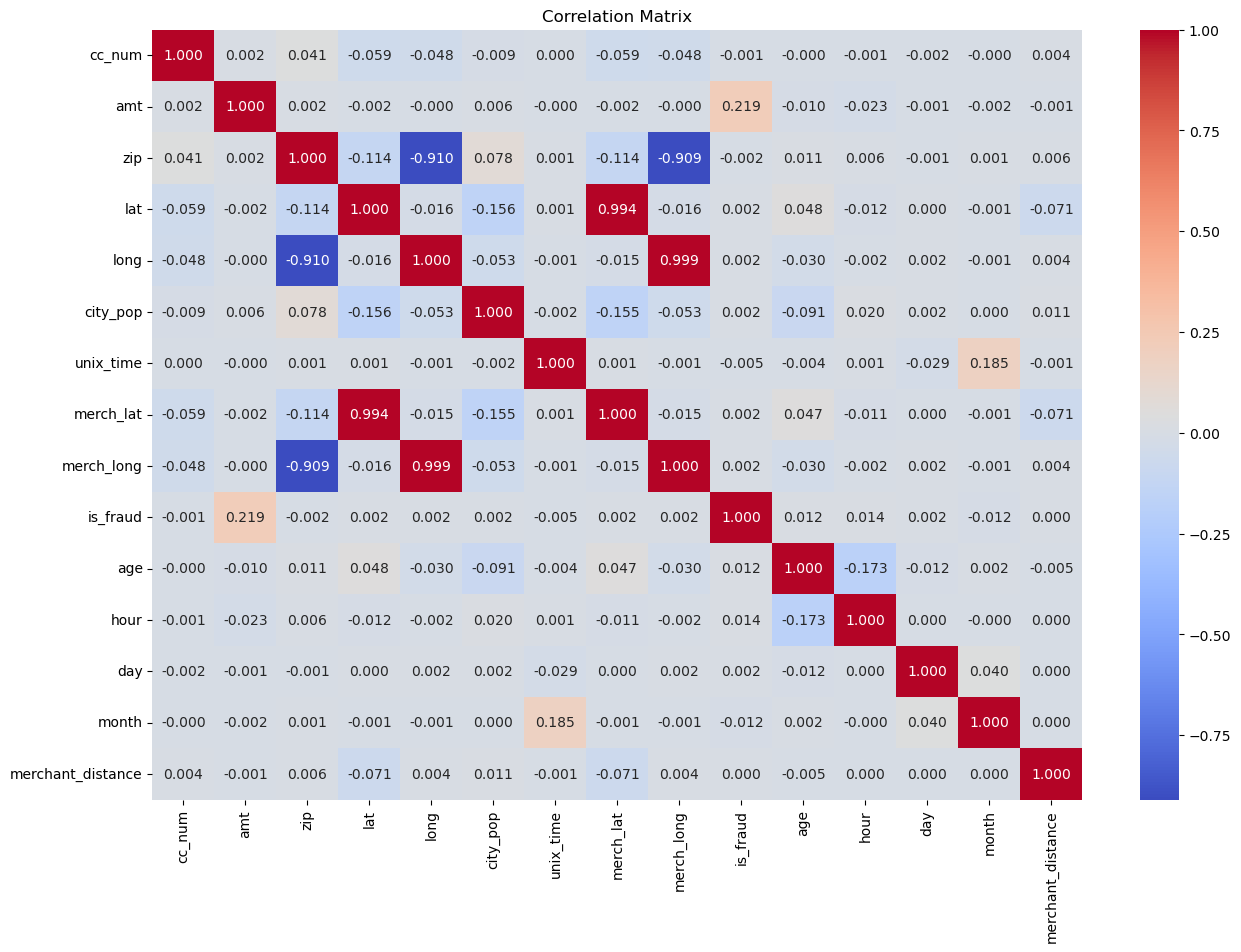

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.corr(), cmap='coolwarm', annot=True, fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

In [34]:
correlation_matrix = train_df.corr()
target_correlation = correlation_matrix['is_fraud'].sort_values(ascending=False)
print("Correlation with Target (is_fraud):")
print(target_correlation)

Correlation with Target (is_fraud):
is_fraud             1.000000
amt                  0.219404
hour                 0.013799
age                  0.012378
city_pop             0.002136
lat                  0.001894
merch_lat            0.001741
day                  0.001739
merch_long           0.001721
long                 0.001721
merchant_distance    0.000404
cc_num              -0.000981
zip                 -0.002162
unix_time           -0.005078
month               -0.012409
Name: is_fraud, dtype: float64


## Machine Learning Model Training

In [35]:
train = train_df[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'is_fraud', 'unix_time', 'merchant_distance', 'gender']]
train = pd.get_dummies(train, drop_first=True)

#Splitting data into features and target
y_train = train['is_fraud'].values
X_train = train.drop("is_fraud", axis='columns').values

In [36]:
#Preparing test data
test_df = test_df[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'is_fraud', 'unix_time', 'merchant_distance', 'gender']]
test_df = pd.get_dummies(test_df, drop_first=True)
y_test = test_df['is_fraud'].values
X_test = test_df.drop("is_fraud", axis='columns').values

In [37]:
#Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
genuine_count = np.sum(y_train == 0)
fraud_count = np.sum(y_train == 1)

total_count = len(y_train)
genuine_percent = (genuine_count / total_count) * 100
fraud_percent = (fraud_count / total_count) * 100

print('Genuine:', genuine_count, '/', round(genuine_percent, 2), '% of the dataset')
print('Frauds:', fraud_count, '/', round(fraud_percent, 2), '% of the dataset')

Genuine: 1289169 / 99.42 % of the dataset
Frauds: 7506 / 0.58 % of the dataset


## Baseline (No Sampling)

In [39]:
#Training a Logistic Regression Classifier
logistic_model = LogisticRegression(random_state=5)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=5)

In [40]:
predicted_logistic = logistic_model.predict(X_test)

In [41]:
#Evaluating the model
print('Classification Report:')
print(classification_report(y_test, predicted_logistic))

print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_logistic))

#Calculating AUC-PR
precision, recall, _ = precision_recall_curve(y_test, predicted_logistic)
print('AUC-PR:', auc(recall, precision))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.02      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.51      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
[[553336    238]
 [  2140      5]]
AUC-PR: 0.013379000546575846


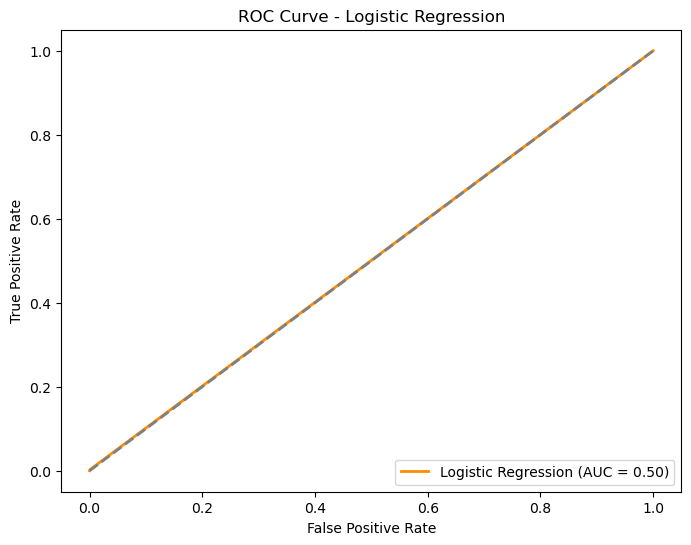

In [42]:
#ROC Curve for Logistic Regression
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, predicted_logistic)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## Oversampling using ADASYN

In [43]:
#Imbalanced Data Handling:
adasyn = ADASYN(random_state=2)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [44]:
genuine_count = np.sum(y_train_adasyn == 0)
fraud_count = np.sum(y_train_adasyn == 1)

total_count = len(y_train_adasyn)
genuine_percent = (genuine_count / total_count) * 100
fraud_percent = (fraud_count / total_count) * 100

print('Genuine:', genuine_count, '/', round(genuine_percent, 2), '% of the dataset')
print('Frauds:', fraud_count, '/', round(fraud_percent, 2), '% of the dataset')

Genuine: 1289169 / 50.01 % of the dataset
Frauds: 1288533 / 49.99 % of the dataset


In [45]:
#Training a Logistic Regression Classifier
lr_adasyn = LogisticRegression(random_state=2)
lr_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = lr_adasyn.predict(X_test)

#Evaluating the model
print('Classification Report:')
print(classification_report(y_test, y_pred_adasyn))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_adasyn))

#Calculating AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_pred_adasyn)
auc_pr = auc(recall, precision)
print('AUC-PR:', auc_pr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90    553574
           1       0.02      0.77      0.03      2145

    accuracy                           0.83    555719
   macro avg       0.51      0.80      0.47    555719
weighted avg       1.00      0.83      0.90    555719

Confusion Matrix:
[[457437  96137]
 [   488   1657]]
AUC-PR: 0.39515804696344475


## Oversampling using SMOTE

SMOTE (Synthetic Minority Oversampling Technique) synthesize elements for the minority class. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [46]:
#Oversampling using SMOTE
method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

In [47]:
genuine_count = np.sum(y_resampled == 0)
fraud_count = np.sum(y_resampled == 1)

total_count = len(y_resampled)
genuine_percent = (genuine_count / total_count) * 100
fraud_percent = (fraud_count / total_count) * 100

print('Genuine:', genuine_count, '/', round(genuine_percent, 2), '% of the dataset')
print('Frauds:', fraud_count, '/', round(fraud_percent, 2), '% of the dataset')

Genuine: 1289169 / 50.0 % of the dataset
Frauds: 1289169 / 50.0 % of the dataset


## Logistic Regression Classifier

In [48]:
#Training a Logistic Regression Classifier
logistic_model = LogisticRegression(random_state=5)
logistic_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=5)

In [49]:
predicted_logistic = logistic_model.predict(X_test)

In [50]:
#Evaluating the model
print('Classification Report:')
print(classification_report(y_test, predicted_logistic))

print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_logistic))

#AUC-PR
precision, recall, _ = precision_recall_curve(y_test, predicted_logistic)
print('AUC-PR:', auc(recall, precision))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.73      0.09      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.84      0.53    555719
weighted avg       1.00      0.94      0.97    555719

Confusion Matrix:
[[522902  30672]
 [   572   1573]]
AUC-PR: 0.3915726937653472


SMOTE shows the promising results among the sampling techniques, with significant improvements in both precision and recall for fraud detection compared to no sampling. Continuing with SMOTE for further modeling seems justified based on its superior performance in detecting fraudulent activities.

/Users/tusharsuvarna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



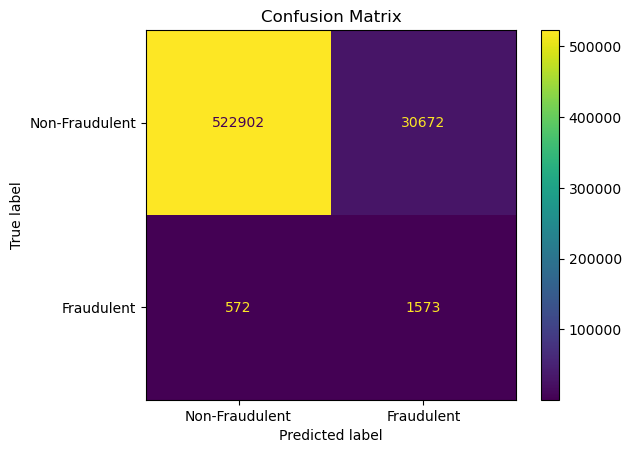

In [51]:
#Plotting confusion matrix
plot_confusion_matrix(logistic_model, X_test, y_test, display_labels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [52]:
#Evaluation metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, predicted_logistic)
precision_logistic = precision_score(y_test, predicted_logistic)
recall_logistic = recall_score(y_test, predicted_logistic)
f1_logistic = f1_score(y_test, predicted_logistic)

print('Accuracy:', accuracy_logistic)
print('Precision:', precision_logistic)
print('Recall:', recall_logistic)
print('F1-score:', f1_logistic)

Accuracy: 0.9437773407063642
Precision: 0.04878275701659172
Recall: 0.7333333333333333
F1-score: 0.09148008141901716


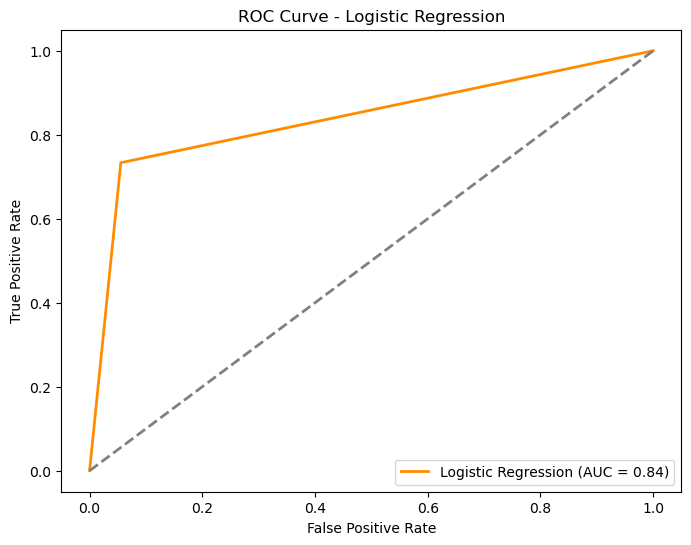

In [53]:
#ROC Curve for Logistic Regression
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, predicted_logistic)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

The Logistic Regression model demonstrates strong performance in identifying non-fraudulent transactions with high precision (1.00) and recall (0.95). However, its ability to detect fraudulent transactions is limited, leading to low precision (0.05) and moderate recall (0.73). The AUC-PR is 0.39, indicating room for improvement in the precision-recall trade-off. The ROC curve has an AUC of 0.84, suggesting decent discriminatory ability, but careful consideration is required due to the imbalanced dataset.

## Random Forest classifier

In [54]:
#Training a Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=2)
random_forest_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=2)

In [55]:
y_pred = random_forest_model.predict(X_test)

In [56]:
#Evaluating the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

#AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_pr = auc(recall, precision)
print('AUC-PR:', auc_pr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.93      0.72      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.86      0.90    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix:
[[553450    124]
 [   600   1545]]
AUC-PR: 0.8235317085085194


/Users/tusharsuvarna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



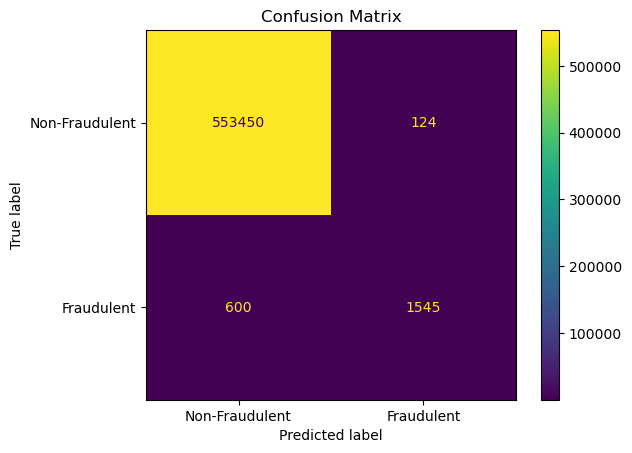

In [57]:
#Plotting confusion matrix
plot_confusion_matrix(random_forest_model, X_test, y_test, display_labels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [58]:
#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9986971832886765
Precision: 0.9257040143798682
Recall: 0.7202797202797203
F1-score: 0.8101730466701625


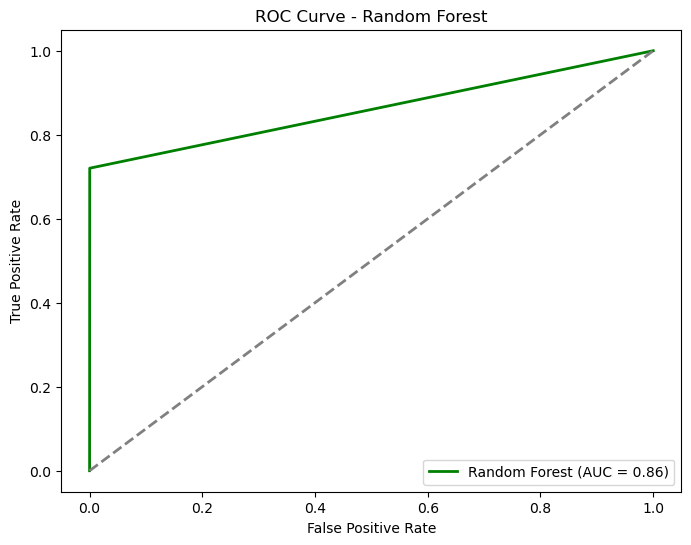

In [59]:
#ROC Curve for Random Forest
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

The Random Forest model demonstrates high precision for both transaction types, with fewer false positives for fraud (0.93) compared to Logistic Regression. The recall for fraud (0.73) is a trade-off for high precision. The AUC-PR is higher at 0.83, suggesting a better balance between precision and recall. The ROC curve has an AUC of 0.87, highlighting the model's overall effectiveness.

In [61]:
train.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'age', 'hour', 'day', 'month', 'is_fraud', 'unix_time',
       'merchant_distance', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M'],
      dtype='object')

In [62]:
feature_importances

array([0.51945701, 0.00739491, 0.00705505, 0.00646165, 0.01107736,
       0.00597563, 0.00561852, 0.01961016, 0.21215243, 0.03325011,
       0.01463104, 0.00815071, 0.00531929, 0.0090963 , 0.02463419,
       0.00684347, 0.02065609, 0.0044797 , 0.01011227, 0.00576369,
       0.00628057, 0.00764184, 0.00367671, 0.0193745 , 0.00752055,
       0.00715617, 0.01061007])

In [63]:
sorted_feature_names

Index(['amt', 'hour', 'day', 'category_food_dining', 'category_grocery_net',
       'age', 'category_personal_care', 'month', 'city_pop', 'category_travel',
       'category_health_fitness', 'merchant_distance', 'is_fraud',
       'category_misc_net', 'category_shopping_net', 'zip',
       'category_shopping_pos', 'lat', 'category_gas_transport', 'long',
       'category_kids_pets', 'merch_lat', 'category_home', 'merch_long',
       'unix_time', 'category_grocery_pos', 'category_misc_pos'],
      dtype='object')

## Gradient Boosting

In [64]:
gradient_boosting_model = GradientBoostingClassifier(random_state=2)
gradient_boosting_model.fit(X_resampled, y_resampled)
y_pred_gb = gradient_boosting_model.predict(X_test)

print("Gradient Boosting:")
print('Classification Report:')
print(classification_report(y_test, y_pred_gb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.16      0.91      0.27      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.95      0.63    555719
weighted avg       1.00      0.98      0.99    555719

Confusion Matrix:
[[543154  10420]
 [   188   1957]]


/Users/tusharsuvarna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



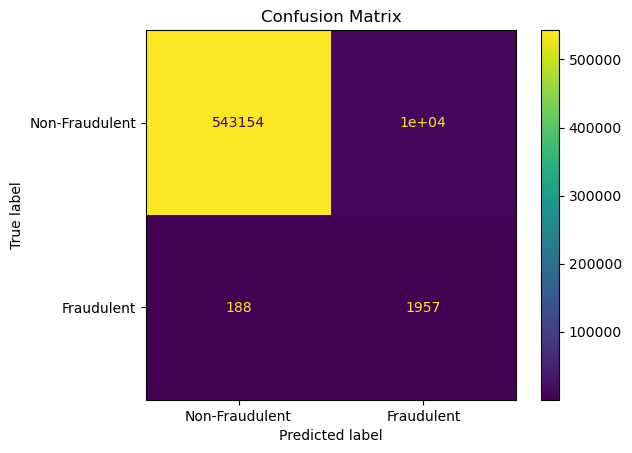

In [65]:
#Plotting confusion matrix
plot_confusion_matrix(gradient_boosting_model, X_test, y_test, display_labels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [66]:
#AUC-PR for Gradient Boosting
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_gb)
auc_pr_gb = auc(recall_gb, precision_gb)
print('AUC-PR:', auc_pr_gb)

AUC-PR: 0.5354042364446667


In [67]:
#Evaluation metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print('Accuracy:', accuracy_gb)
print('Precision:', precision_gb)
print('Recall:', recall_gb)
print('F1-score:', f1_gb)

Accuracy: 0.9809112159202763
Precision: 0.1581158600630201
Recall: 0.9123543123543123
F1-score: 0.26952210439333424


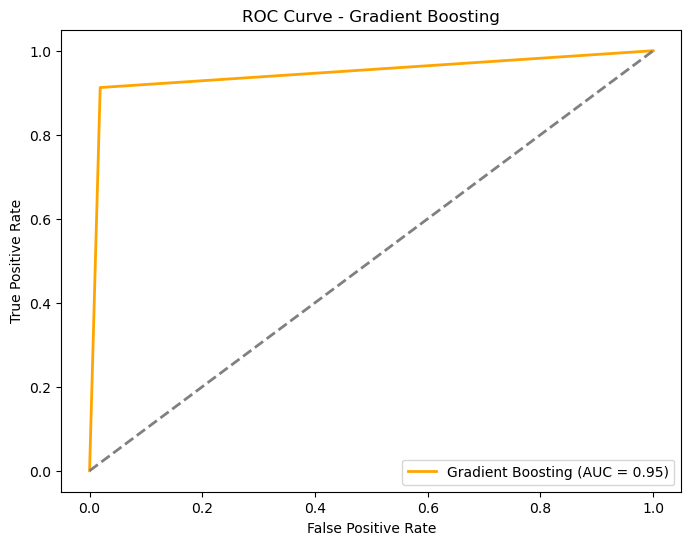

In [68]:
#ROC Curve for Gradient Boosting
plt.figure(figsize=(8, 6))
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, color='orange', lw=2, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

## XGBOOST

In [69]:
xgb_model = xgb.XGBClassifier(random_state=2)
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [70]:
y_pred_xgb = xgb_model.predict(X_test)
print('Classification Report:')
print(classification_report(y_test, y_pred_xgb))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.85      0.79      0.82      2145

    accuracy                           1.00    555719
   macro avg       0.92      0.90      0.91    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix:
[[553265    309]
 [   448   1697]]


/Users/tusharsuvarna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



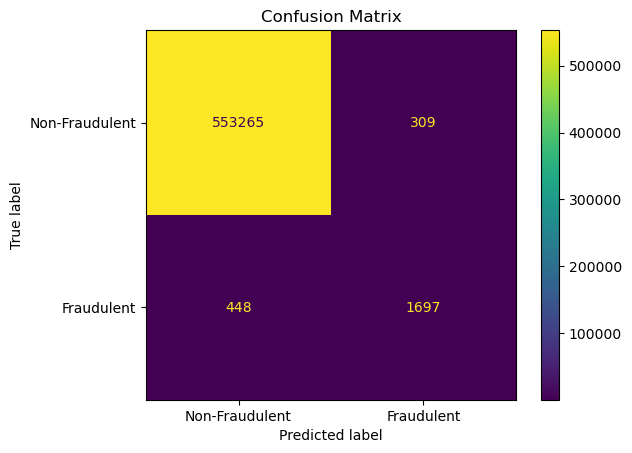

In [71]:
#Plotting confusion matrix
plot_confusion_matrix(xgb_model, X_test, y_test, display_labels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [72]:
#AUC-PR
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)
auc_pr_xgb = auc(recall_xgb, precision_xgb)
print('AUC-PR:', auc_pr_xgb)

AUC-PR: 0.8189552338140552


In [73]:
#Evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print('Accuracy:', accuracy_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.9986378007590166
Precision: 0.845962113659023
Recall: 0.7911421911421911
F1-score: 0.8176343049867502


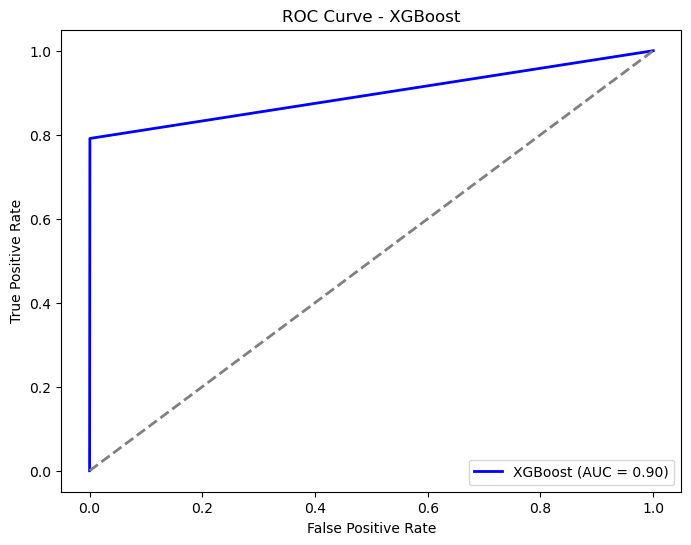

In [74]:
#ROC Curve for XGBoost
plt.figure(figsize=(8, 6))
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

## Model Comparison

### Receiver Operating Characteristic (ROC) Curve

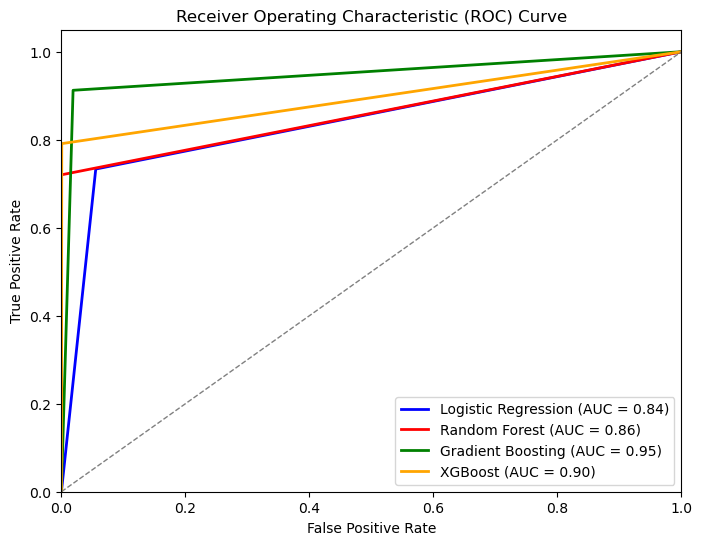

In [75]:
#Calculating ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, predicted_logistic)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
auc_gb = auc(fpr_gb, tpr_gb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

#Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label='Gradient Boosting (AUC = %0.2f)' % auc_gb)
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label='XGBoost (AUC = %0.2f)' % auc_xgb)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest exhibited an area under the curve (AUC) of 0.86, indicating its effectiveness in distinguishing between true positive rates and false positive rates. XGBoost followed closely with an AUC of 0.90. Gradient Boost outperformed the other models with an impressive AUC of 0.95, highlighting its superior ability to differentiate between true and false positives. Conversely, Logistic Regression lagged behind the other models, suggesting limitations in its ability to accurately classify fraudulent transactions.

### Precision-Recall Curve

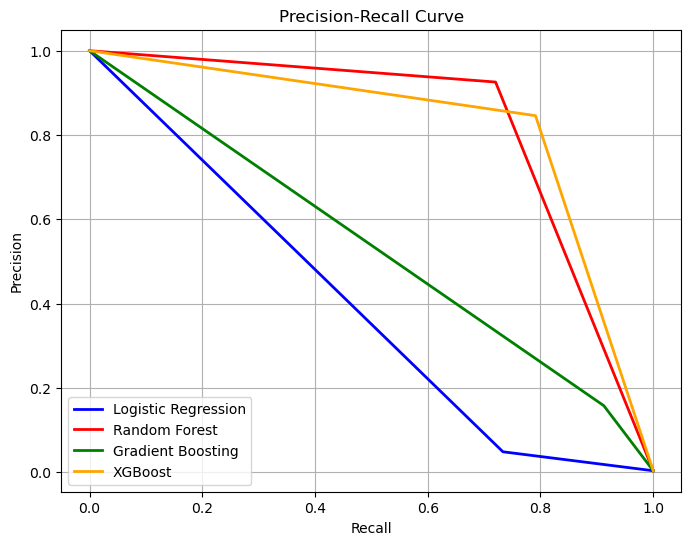

In [76]:
from sklearn.metrics import precision_recall_curve

#Calculating Precision-Recall curve for each model
precision_lr, recall_lr, _ = precision_recall_curve(y_test, predicted_logistic)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_gb)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)

#Plotting the Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, color='red', lw=2, label='Random Forest')
plt.plot(recall_gb, precision_gb, color='green', lw=2, label='Gradient Boosting')
plt.plot(recall_xgb, precision_xgb, color='orange', lw=2, label='XGBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Random Forest as the standout performer in terms of precision-recall balance, boasting an AUC-PR of 0.83. This underscores Random Forest's effectiveness in handling imbalanced datasets, a crucial aspect of fraud detection tasks. Comparatively, Logistic Regression exhibited a significantly lower AUC-PR of 0.39, indicating its limitations in capturing true positives while minimizing false alarms. Gradient Boost and XGBoost fell in between with AUC-PR scores of 0.53 and 0.82, respectively, showcasing their moderate performance in precision-recall trade-off.

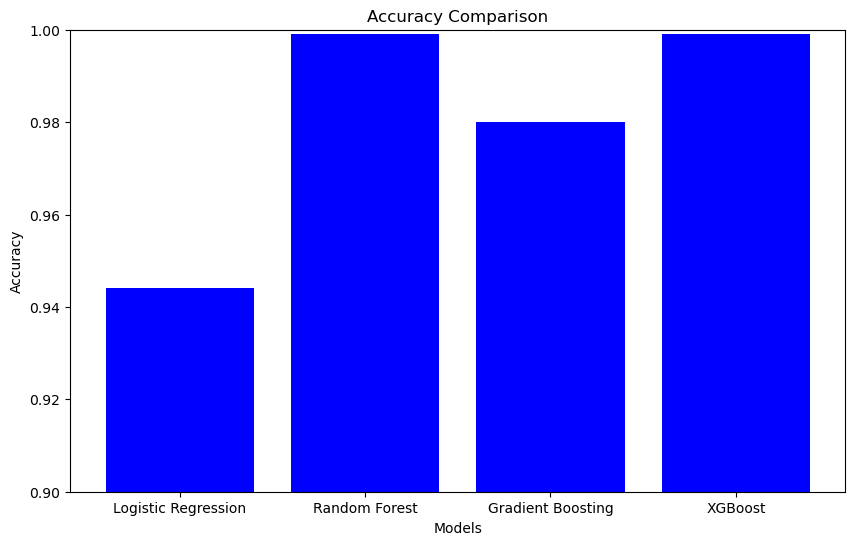

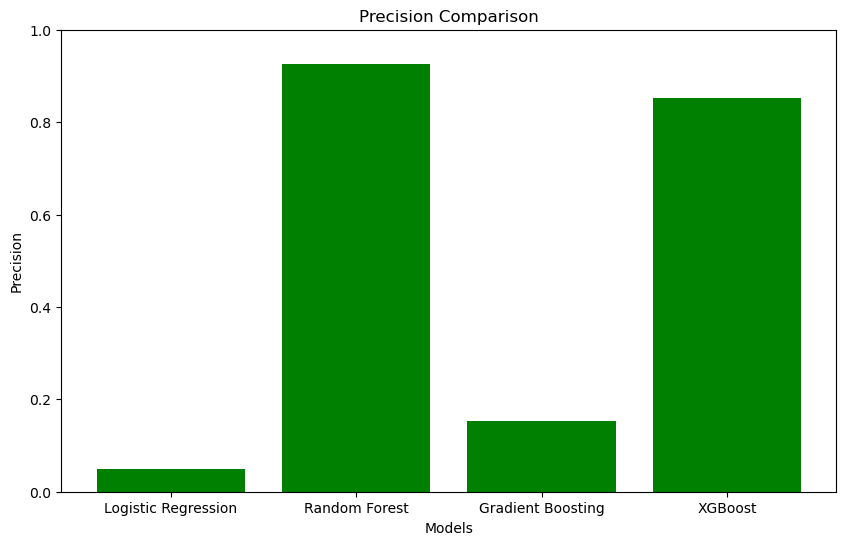

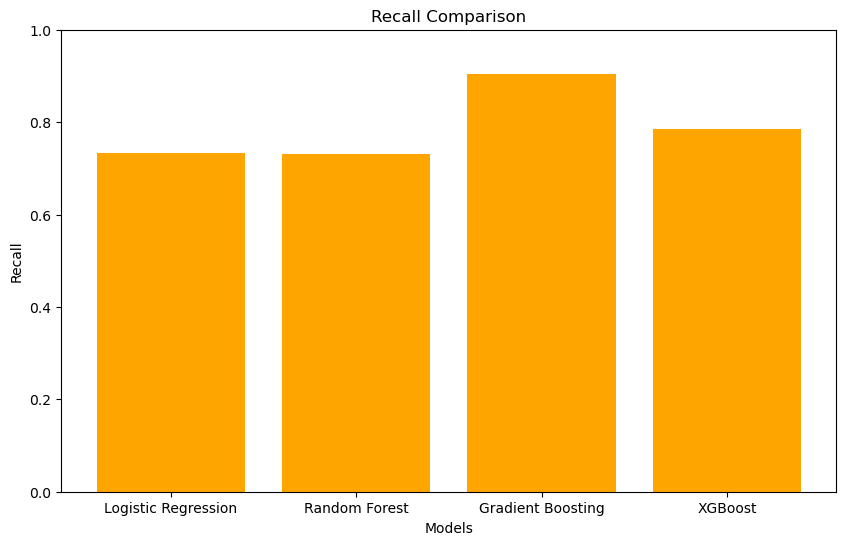

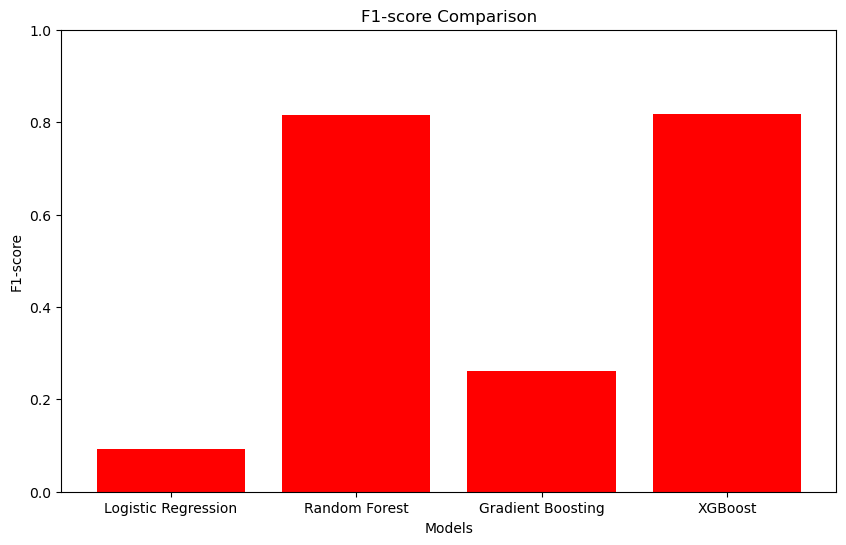

In [77]:
models = [
    "Logistic Regression",
    "Random Forest",
    "Gradient Boosting",
    "XGBoost"
]

#Accuracy comparison
accuracy = [0.944, 0.999, 0.980, 0.999]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0.9, 1.0)
plt.show()

# Precision comparison
precision = [0.049, 0.926, 0.152, 0.853]
plt.figure(figsize=(10, 6))
plt.bar(models, precision, color='green')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.ylim(0, 1.0)
plt.show()

#Recall comparison
recall = [0.733, 0.731, 0.905, 0.785]
plt.figure(figsize=(10, 6))
plt.bar(models, recall, color='orange')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.ylim(0, 1.0)
plt.show()

#F1-score comparison
f1_score = [0.092, 0.816, 0.261, 0.817]
plt.figure(figsize=(10, 6))
plt.bar(models, f1_score, color='red')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')
plt.ylim(0, 1.0)
plt.show()

Upon comparing the performance of the models, several observations can be made:
- Random forest and XGBoost achieved the highest accuracy among all models. However, accuracy alone may not be sufficient for evaluating fraud detection models, especially in the case of imbalanced datasets.
- Random forest exhibited the highest precision for both non-fraudulent and fraudulent transactions, indicating its effectiveness in minimizing false positives.
- Gradient boosting showed the highest recall for identifying fraudulent transactions, indicating the model's ability to capture all instances of fraudulent activity.
- Random forest achieved the highest area under the precision-recall curve (AUC-PR), indicating its superior overall performance in precision-recall trade-off.

## Feature Importance

After Random Forest emerged as the top-performing model, a further analysis of feature importance was conducted to gain deeper insights into the factors driving fraud predictions.

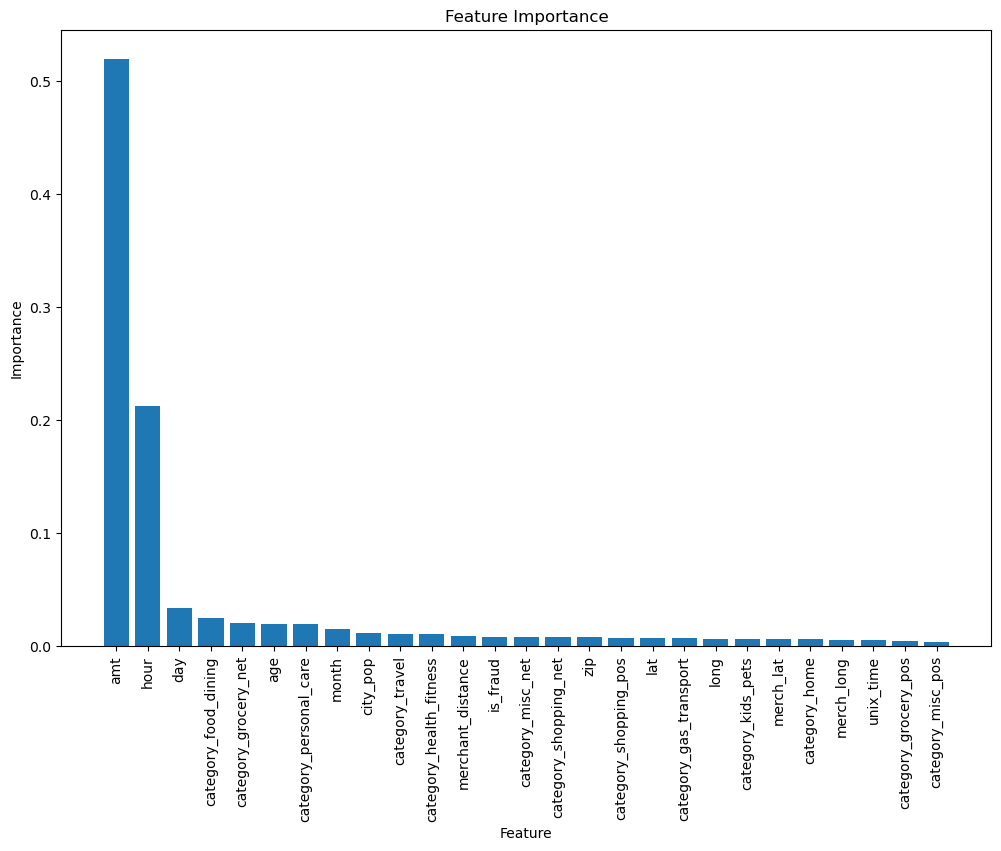

In [78]:
feature_importances = random_forest_model.feature_importances_
feature_names = train.columns

indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[indices]
sorted_feature_names = feature_names[indices]

plt.figure(figsize=(12, 8))
plt.bar(feature_names[:-1], sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

- Transaction amount stood out as the most influential feature, indicating its significant contribution to fraud detection accuracy. 
- Temporal dynamics, including the hour, day, and month of transactions, also played a crucial role, suggesting certain periods may be more prone to fraudulent activity. 
- Furthermore, user age emerged as another key determinant of fraud predictions. 
- Categorical features related to transaction categories, such as food/dining, personal care and grocery, also showed notable importance, highlighting the influence of transaction nature on fraud detection accuracy.

## What Next?
1. Future research may involve fine-tuning model parameters to optimize performance further. 
2. Exploring alternative advanced algorithms for enhancing detection accuracy. 
3. Further investigation into model trade-offs and interpretability will refine our understanding and strengthen our defense against financial fraud.

## Conclusion
Advanced analytics techniques offer promising solution for combating financial fraud. By leveraging insights from machine learning and feature engineering, financial institutions can enhance fraud detection systems and bolster security measures, ultimately safeguarding the integrity of digital transactions and maintaining trust in financial systems.